# A/B Testing for ShoeFly.com

Our favorite online shoe store, ShoeFly.com is performing an A/B Test. They have two different versions of an ad, which they have placed in emails, as well as in banner ads on Facebook, Twitter, and Google. They want to know how the two ads are performing on each of the different platforms on each day of the week. Help them analyze the data using aggregate measures.

In [2]:
import pandas as pd

ad_clicks = pd.read_csv('ad_clicks.csv')
print(ad_clicks.head(10))

                                user_id utm_source            day  \
0  008b7c6c-7272-471e-b90e-930d548bd8d7     google   6 - Saturday   
1  009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook     7 - Sunday   
2  00f5d532-ed58-4570-b6d2-768df5f41aed    twitter    2 - Tuesday   
3  011adc64-0f44-4fd9-a0bb-f1506d2ad439     google    2 - Tuesday   
4  012137e6-7ae7-4649-af68-205b4702169c   facebook     7 - Sunday   
5  013b0072-7b72-40e7-b698-98b4d0c9967f   facebook     1 - Monday   
6  0153d85b-7660-4c39-92eb-1e1acd023280     google   4 - Thursday   
7  01555297-d6e6-49ae-aeba-1b196fdbb09f     google  3 - Wednesday   
8  018cea61-19ea-4119-895b-1a4309ccb148      email     1 - Monday   
9  01a210c3-fde0-4e6f-8efd-4f0e38730ae6      email    2 - Tuesday   

  ad_click_timestamp experimental_group  
0               7:18                  A  
1                NaN                  B  
2                NaN                  A  
3                NaN                  B  
4                NaN          

How many views (i.e., rows of the table) came from each `utm_source`?

In [3]:
clicks_by_utm = ad_clicks.groupby('utm_source').user_id.count().reset_index()
print(clicks_by_utm)

  utm_source  user_id
0      email      255
1   facebook      504
2     google      680
3    twitter      215


If the column `ad_click_timestamp` is not `null`, then someone actually clicked on the ad that was displayed.

Create a new column called `is_click`, which is `True` if `ad_click_timestamp` is not `null` and `False` otherwise.

In [4]:
ad_clicks['is_click'] = ~ad_clicks.ad_click_timestamp.isnull()
print(ad_clicks.head(10))

                                user_id utm_source            day  \
0  008b7c6c-7272-471e-b90e-930d548bd8d7     google   6 - Saturday   
1  009abb94-5e14-4b6c-bb1c-4f4df7aa7557   facebook     7 - Sunday   
2  00f5d532-ed58-4570-b6d2-768df5f41aed    twitter    2 - Tuesday   
3  011adc64-0f44-4fd9-a0bb-f1506d2ad439     google    2 - Tuesday   
4  012137e6-7ae7-4649-af68-205b4702169c   facebook     7 - Sunday   
5  013b0072-7b72-40e7-b698-98b4d0c9967f   facebook     1 - Monday   
6  0153d85b-7660-4c39-92eb-1e1acd023280     google   4 - Thursday   
7  01555297-d6e6-49ae-aeba-1b196fdbb09f     google  3 - Wednesday   
8  018cea61-19ea-4119-895b-1a4309ccb148      email     1 - Monday   
9  01a210c3-fde0-4e6f-8efd-4f0e38730ae6      email    2 - Tuesday   

  ad_click_timestamp experimental_group  is_click  
0               7:18                  A      True  
1                NaN                  B     False  
2                NaN                  A     False  
3                NaN            


We want to know the percent of people who clicked on ads from each `utm_source`.

Start by grouping by `utm_source` and `is_click` and counting the number of `user_id`‘s in each of those groups. Save your answer to the variable clicks_by_source.

In [5]:
clicks_by_source = ad_clicks.groupby(['utm_source', 'is_click']).user_id.count().reset_index()
print(clicks_by_source)

  utm_source  is_click  user_id
0      email     False      175
1      email      True       80
2   facebook     False      324
3   facebook      True      180
4     google     False      441
5     google      True      239
6    twitter     False      149
7    twitter      True       66



Now let’s pivot the data so that the columns are is_click (either True or False), the index is utm_source, and the values are user_id.

Save your results to the variable clicks_pivot.

In [6]:
clicks_pivot = clicks_by_source.pivot(
  index='utm_source',
  columns='is_click',
  values='user_id'
).reset_index()


Create a new column in `clicks_pivot` called `percent_clicked` which is equal to the percent of users who clicked on the ad from each utm_source.

Was there a difference in click rates for each source?

In [7]:
clicks_pivot['percent_clicked'] = clicks_pivot[True] / (clicks_pivot[True] + clicks_pivot[False])
print(clicks_pivot)

is_click utm_source  False  True  percent_clicked
0             email    175    80         0.313725
1          facebook    324   180         0.357143
2            google    441   239         0.351471
3           twitter    149    66         0.306977


## Analyzing an A/B Test

The column `experimental_group` tells us whether the user was shown Ad A or Ad B.

Were approximately the same number of people shown both ads?

In [8]:
print(ad_clicks.groupby('experimental_group').user_id.count().reset_index())

  experimental_group  user_id
0                  A      827
1                  B      827


Using the column `is_click` that we defined earlier, check to see if a greater percentage of users clicked on Ad A or Ad B.

In [9]:
clicks_by_group = ad_clicks.groupby(['experimental_group', 'is_click']).user_id.count().reset_index()
clicks_by_group_pivot = clicks_by_group.pivot(index='experimental_group', columns='is_click', values='user_id').reset_index()
print(clicks_by_group_pivot)

is_click experimental_group  False  True
0                         A    517   310
1                         B    572   255


In [10]:
a_clicks_true = ad_clicks[(ad_clicks.experimental_group == 'A') & (ad_clicks.is_click == True)].user_id.count()
a_clicks_total = ad_clicks[(ad_clicks.experimental_group == 'A')].user_id.count()

b_clicks_true = ad_clicks[(ad_clicks.experimental_group == 'B') & (ad_clicks.is_click == True)].user_id.count()
b_clicks_total = ad_clicks[(ad_clicks.experimental_group == 'B')].user_id.count()

# create a function to show a decimal as a percentage rounded to two decimal places
def show_as_percent(x):
    return str(round(x * 100, 2)) + '%'

print("Group A clicked: ", show_as_percent(a_clicks_true/a_clicks_total))
print("Group B clicked: ", show_as_percent(b_clicks_true/b_clicks_total))

Group A clicked:  37.48%
Group B clicked:  30.83%



The Product Manager for the A/B test thinks that the clicks might have changed by day of the week.

Start by creating two DataFrames: `a_clicks` and `b_clicks`, which contain only the results for A group and B group, respectively.

In [11]:
a_clicks = ad_clicks[ad_clicks.experimental_group == 'A']
b_clicks = ad_clicks[ad_clicks.experimental_group == 'B']


For each group (a_clicks and b_clicks), calculate the percent of users who clicked on the ad by day.

In [12]:
a_clicks_by_day = a_clicks.groupby(['is_click', 'day']).user_id.count().reset_index()
a_clicks_by_day_pivot = a_clicks_by_day.pivot(
  index='day',
  columns='is_click',
  values='user_id'
).reset_index()
a_clicks_by_day_pivot['percent_clicked'] = a_clicks_by_day_pivot[True] / (a_clicks_by_day_pivot[True] + a_clicks_by_day_pivot[False])

b_clicks_by_day = b_clicks.groupby(['is_click', 'day']).user_id.count().reset_index()
b_clicks_by_day_pivot = b_clicks_by_day.pivot(
  index='day',
  columns='is_click',
  values='user_id'
).reset_index()
b_clicks_by_day_pivot['percent_clicked'] = b_clicks_by_day_pivot[True] / (b_clicks_by_day_pivot[True] + b_clicks_by_day_pivot[False])


Compare the results for A and B. What happened over the course of the week?

Do you recommend that your company use Ad A or Ad B?

In [13]:
print(a_clicks_by_day_pivot)

is_click            day  False  True  percent_clicked
0            1 - Monday     70    43         0.380531
1           2 - Tuesday     76    43         0.361345
2         3 - Wednesday     86    38         0.306452
3          4 - Thursday     69    47         0.405172
4            5 - Friday     77    51         0.398438
5          6 - Saturday     73    45         0.381356
6            7 - Sunday     66    43         0.394495


In [14]:
print(b_clicks_by_day_pivot)

is_click            day  False  True  percent_clicked
0            1 - Monday     81    32         0.283186
1           2 - Tuesday     74    45         0.378151
2         3 - Wednesday     89    35         0.282258
3          4 - Thursday     87    29         0.250000
4            5 - Friday     90    38         0.296875
5          6 - Saturday     76    42         0.355932
6            7 - Sunday     75    34         0.311927


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
a_clicks_pc_by_day = a_clicks_by_day_pivot[['day', 'percent_clicked']]
b_clicks_pc_by_day = b_clicks_by_day_pivot[['day', 'percent_clicked']]

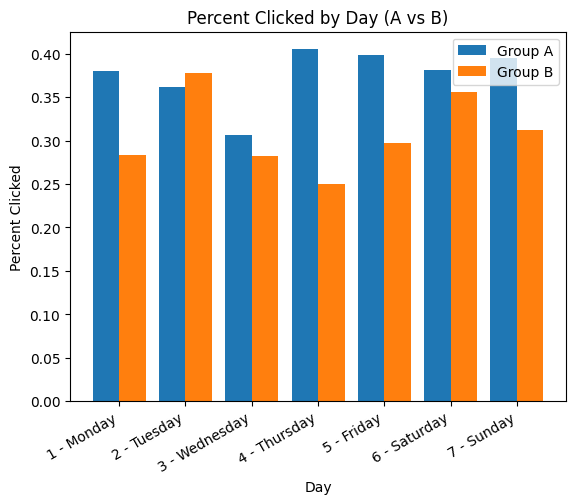

In [25]:
width = 0.4
rects1 = plt.bar(a_clicks_pc_by_day['day'], a_clicks_pc_by_day['percent_clicked'], -width, align='edge', label='A')
rects2 = plt.bar(b_clicks_pc_by_day['day'], b_clicks_pc_by_day['percent_clicked'], +width, align='edge', label='B')
plt.xticks(rotation=30, ha='right')
plt.xlabel('Day')
plt.ylabel('Percent Clicked')
plt.legend(['Group A', 'Group B'])
plt.title('Percent Clicked by Day (A vs B)')
plt.show()